In [2]:
library(readxl)

# Import datasets
data_by_question <- read_excel("/kaggle/input/cactus-global-inf-stats-project/INQ_JHAHC_11_04122024-1425_Healthcare_Business_Continuity_Management_Thesis_Study-2_By_question.xlsx")
data_full <- read_excel("/kaggle/input/cactus-global-inf-stats-project/INQ_JHAHC_11_04122024-1425_Healthcare_Business_Continuity_Management_Thesis_Study.xlsx")


New names:
• `` -> `...2`
• `` -> `...3`
Warning message:
“Expecting numeric in D3 / R3C4: got a date”
Warning message:
“Expecting numeric in D4 / R4C4: got a date”
Warning message:
“Expecting numeric in D5 / R5C4: got a date”
Warning message:
“Expecting numeric in D6 / R6C4: got a date”
Warning message:
“Expecting numeric in D7 / R7C4: got a date”
Warning message:
“Expecting numeric in D8 / R8C4: got a date”
Warning message:
“Expecting numeric in D9 / R9C4: got a date”
Warning message:
“Expecting numeric in D10 / R10C4: got a date”
Warning message:
“Expecting numeric in D11 / R11C4: got a date”
Warning message:
“Expecting numeric in D12 / R12C4: got a date”
Warning message:
“Expecting numeric in D13 / R13C4: got a date”
Warning message:
“Expecting numeric in D14 / R14C4: got a date”
Warning message:
“Expecting numeric in D15 / R15C4: got a date”
Warning message:
“Expecting numeric in D16 / R16C4: got a date”
Warning message:
“Expecting numeric in D17 / R17C4: got a date”
Warning messa

In [3]:
# View structure and summary
str(data_by_question)
summary(data_by_question)

str(data_full)
summary(data_full)


tibble [71 × 3] (S3: tbl_df/tbl/data.frame)
 $ Healthcare Business Continuity Management Thesis Study: chr [1:71] "Quiz Summary" "Average Score 67% 55/81 PTS" "Score" "0-10%" ...
 $ ...2                                                  : chr [1:71] NA NA "Number of respondents" "11" ...
 $ ...3                                                  : chr [1:71] NA NA NA NA ...


 Healthcare Business Continuity Management Thesis Study     ...2          
 Length:71                                              Length:71         
 Class :character                                       Class :character  
 Mode  :character                                       Mode  :character  
     ...3          
 Length:71         
 Class :character  
 Mode  :character  

tibble [51 × 64] (S3: tbl_df/tbl/data.frame)
 $ #                                                                                       : num [1:51] NA 35 41 4 21 22 28 1 5 19 ...
 $ Respondent ID                                                                           : num [1:51] NA 1.19e+11 1.19e+11 1.19e+11 1.19e+11 ...
 $ Collector ID                                                                            : chr [1:51] NA "457207270" "457207270" "457660216" ...
 $ Start Date                                                                              : num [1:51] NA 45533 45496 45558 45544 ...
 $ End Date                                                                                : chr [1:51] NA "45532.775289351855" "45495.996331018519" "45557.778495370374" ...
 $ IP Address                                                                              : chr [1:51] NA "62.209.14.100" "94.224.0.150" "98.182.35.28" ...
 $ Province                                                 

       #        Respondent ID       Collector ID         Start Date   
 Min.   : 1.0   Min.   :1.187e+11   Length:51          Min.   :    2  
 1st Qu.:11.5   1st Qu.:1.187e+11   Class :character   1st Qu.:45532  
 Median :22.0   Median :1.187e+11   Mode  :character   Median :45544  
 Mean   :22.0   Mean   :1.187e+11                      Mean   :40797  
 3rd Qu.:32.5   3rd Qu.:1.187e+11                      3rd Qu.:45544  
 Max.   :43.0   Max.   :1.187e+11                      Max.   :45560  
 NA's   :8      NA's   :8                              NA's   :3      
   End Date          IP Address          Province             City          
 Length:51          Length:51          Length:51          Length:51         
 Class :character   Class :character   Class :character   Class :character  
 Mode  :character   Mode  :character   Mode  :character   Mode  :character  
                                                                            
                                               

In [4]:
#Data Cleaning 

# Count missing values for each column
colSums(is.na(data_by_question))
colSums(is.na(data_full))


Healthcare Business Continuity Management Thesis Study 
                                                    19 
                                                  ...2 
                                                    23 
                                                  ...3 
                                                    36

# 
                                                                                       8 
                                                                           Respondent ID 
                                                                                       8 
                                                                            Collector ID 
                                                                                       3 
                                                                              Start Date 
                                                                                       3 
                                                                                End Date 
                                                                                       3 
                                                                              IP Address 
                                                                                       8 
                                                                                Province 
                                                                                       7 
                                                                                    City 
                                                                                       7 
                                                              Hospital's Name (Optional) 
                                                                                      33 
                                                             Year of CBAHI accreditation 
                                                                                      16 
                                                             Year of Other accreditation 
                                                                                      30 
                                             Is it a private or governmental healthcare? 
                                                                                       7 
      Please select the clinical Services available at your center (Multiple selections) 
                                                                                      13 
                                                                                   ...14 
                                                                                      12 
                                                                                   ...15 
                                                                                       9 
                                                                                   ...16 
                                                                                      13 
                                                                                   ...17 
                                                                                      38 
                            Business Continuity Plan (BCP) is available in the hospital? 
                                                                                       8 
                          Does your BCP follow ISO 22301 Business Continuity Management? 
                                                                                      17 
                                                      Is the scope mentioned in the BCP? 
                                                                                      18 
Definitions of all the specific Business Continuity terms utilized are mentioned in BCP? 
                                                                                      17 
                              What are the references used in BCP? (Multiple selections) 
                                                                                      29 
                                                                                   ...23 
                                     

In [5]:
# Threshold for exclusion (e.g., remove columns with more than 80% missing values)
threshold <- 0.8
data_by_question <- data_by_question[, colMeans(is.na(data_by_question)) < threshold]
data_full <- data_full[, colMeans(is.na(data_full)) < threshold]


In [6]:
str(data_by_question)
str(data_full)


tibble [71 × 3] (S3: tbl_df/tbl/data.frame)
 $ Healthcare Business Continuity Management Thesis Study: chr [1:71] "Quiz Summary" "Average Score 67% 55/81 PTS" "Score" "0-10%" ...
 $ ...2                                                  : chr [1:71] NA NA "Number of respondents" "11" ...
 $ ...3                                                  : chr [1:71] NA NA NA NA ...
tibble [51 × 58] (S3: tbl_df/tbl/data.frame)
 $ #                                                                                       : num [1:51] NA 35 41 4 21 22 28 1 5 19 ...
 $ Respondent ID                                                                           : num [1:51] NA 1.19e+11 1.19e+11 1.19e+11 1.19e+11 ...
 $ Collector ID                                                                            : chr [1:51] NA "457207270" "457207270" "457660216" ...
 $ Start Date                                                                              : num [1:51] NA 45533 45496 45558 45544 ...
 $ End Date      

In [7]:
# Install dplyr package
install.packages("dplyr")


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [8]:
# Load the dplyr package
library(dplyr)



Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [9]:
# Drop columns that are not relevant for analysis
data_full <- data_full %>%
  select(-c(`#`, `Respondent ID`, `Collector ID`, `Start Date`, `End Date`, `IP Address`, 
            `Hospital's Name (Optional)`))


In [10]:
# Verify the structure of the updated dataset
str(data_full)


tibble [51 × 51] (S3: tbl_df/tbl/data.frame)
 $ Province                                                                                : chr [1:51] "Response" "Bahrain" "UZ Brussels" "Eastern Province" ...
 $ City                                                                                    : chr [1:51] "Open-Ended Response" "Riffa" "Brussels" "Dammam" ...
 $ Year of CBAHI accreditation                                                             : chr [1:51] "Open-Ended Response" NA NA "2022" ...
 $ Year of Other accreditation                                                             : chr [1:51] "Open-Ended Response" NA NA NA ...
 $ Is it a private or governmental healthcare?                                             : chr [1:51] "Response" "Governmental" "Private" "Governmental" ...
 $ Please select the clinical Services available at your center (Multiple selections)      : chr [1:51] "In-patients (Adult/ Pediatric/ Critical Care)" NA "In-patients (Adult/ Pediatric/ Critica

In [11]:
#Simple Analysis Stage 1

# Summary of relevant categorical columns
table(data_full$`Is it a private or governmental healthcare?`)
table(data_full$`Business Continuity Plan (BCP) is available in the hospital?`)

# Check unique responses for accreditation year
unique(data_full$`Year of CBAHI accreditation`)
unique(data_full$`Year of Other accreditation`)



Governmental      Private     Response 
          29           14            1 


Draft under process                  No            Response                 Yes 
                 12                   4                   1                  26 

[1] "Open-Ended Response" NA                    "2022"               
 [4] "2018"                "2023"                "6"                  
 [7] "4"                   "3"                   "5"                  
[10] "2024"                "8"                   "Accredited"         
[13] "12"                  "Don’t know"          "2"                  
[16] "2021"                "16 years"            "2017"               
[19] "2020"                "I don’t know"

[1] "Open-Ended Response" NA                    "No"                 
 [4] "14"                  "8"                   "Unknown"            
 [7] "2023"                "2021"                "12"                 
[10] "Don’t know"          "2"                   "JCIA 2023"          
[13] "JCI"                 "20222"               "20 years"           
[16] "2011"                "2034"                "JCI 2023"

Categorical Analysis
a. Healthcare Type Distribution
Governmental: 29 responses
Private: 14 responses
Response: 1 (seems like an invalid entry)
b. BCP Status
Draft under process: 12
No: 4
Yes: 26
Response: 1 (likely an invalid entry)
These distributions provide an overview of the data and help identify possible cleaning needs (e.g., remove invalid entries like "Response").
Open-Ended Accreditation Year Responses
The accreditation year data contains inconsistent entries like:

"Open-Ended Response", "Accredited", "Don’t know", "JCI 2023", etc.
Suggested Cleaning:
Filter out non-numeric or invalid entries like "Open-Ended Response", "Accredited", "Don’t know".
Extract valid numeric values like 2022, 2018, etc., for analysis.

In [12]:
# Filter out non-numeric entries
valid_years <- data_full$`Year of CBAHI accreditation`[!is.na(as.numeric(data_full$`Year of CBAHI accreditation`))]
valid_years <- as.numeric(valid_years)

# Check cleaned data
mean(valid_years, na.rm = TRUE)
median(valid_years, na.rm = TRUE)
range(valid_years, na.rm = TRUE)


Warning message in eval(expr, envir, enclos):
“NAs introduced by coercion”


[1] 1484.767

[1] 2022

[1]    2 2024

In [13]:
# Strict filtering: Only 4-digit years
valid_years <- data_full$`Year of CBAHI accreditation`[grepl("^[0-9]{4}$", data_full$`Year of CBAHI accreditation`)]
valid_years <- as.numeric(valid_years)

# Calculate central tendency again
mean(valid_years, na.rm = TRUE)
median(valid_years, na.rm = TRUE)
range(valid_years, na.rm = TRUE)


[1] 2022.318

[1] 2023

[1] 2017 2024

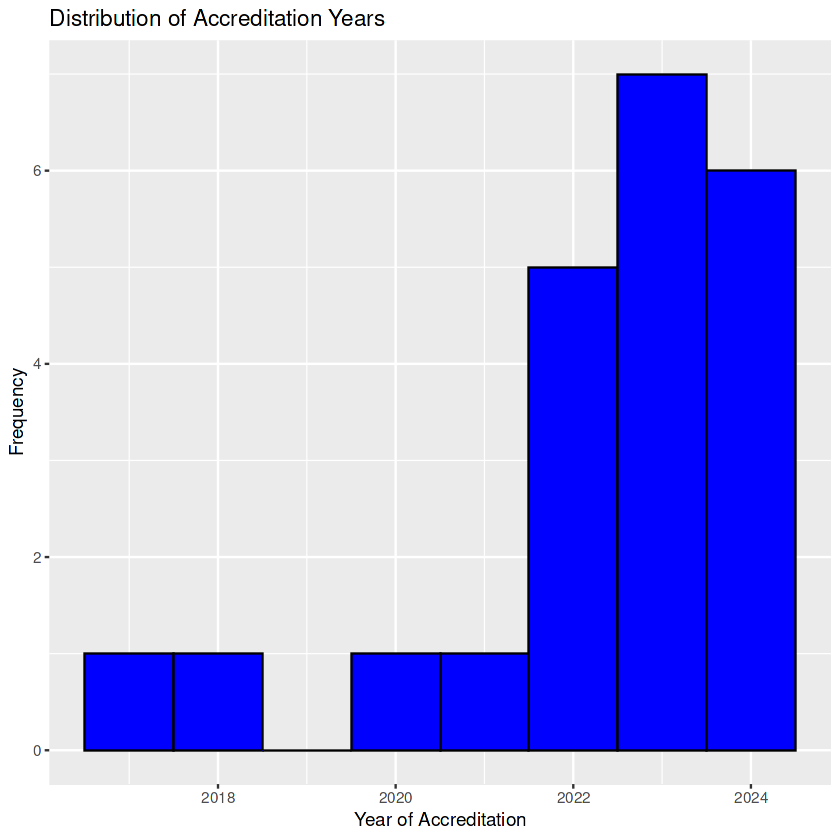

In [14]:
#Data Visualization 

library(ggplot2)

# Histogram for accreditation years
ggplot(data.frame(valid_years), aes(x = valid_years)) +
  geom_histogram(binwidth = 1, fill = "blue", color = "black") +
  ggtitle("Distribution of Accreditation Years") +
  xlab("Year of Accreditation") +
  ylab("Frequency")


Warning message:
“There was 1 warning in `filter()`.
ℹ In argument: `&...`.
Caused by warning:
! NAs introduced by coercion”


# A tibble: 2 × 4
  `Is it a private or governmental healthcare?` Mean_Year Median_Year Count
  <chr>                                             <dbl>       <dbl> <int>
1 Governmental                                      2022.        2023    17
2 Private                                           2022         2023     5


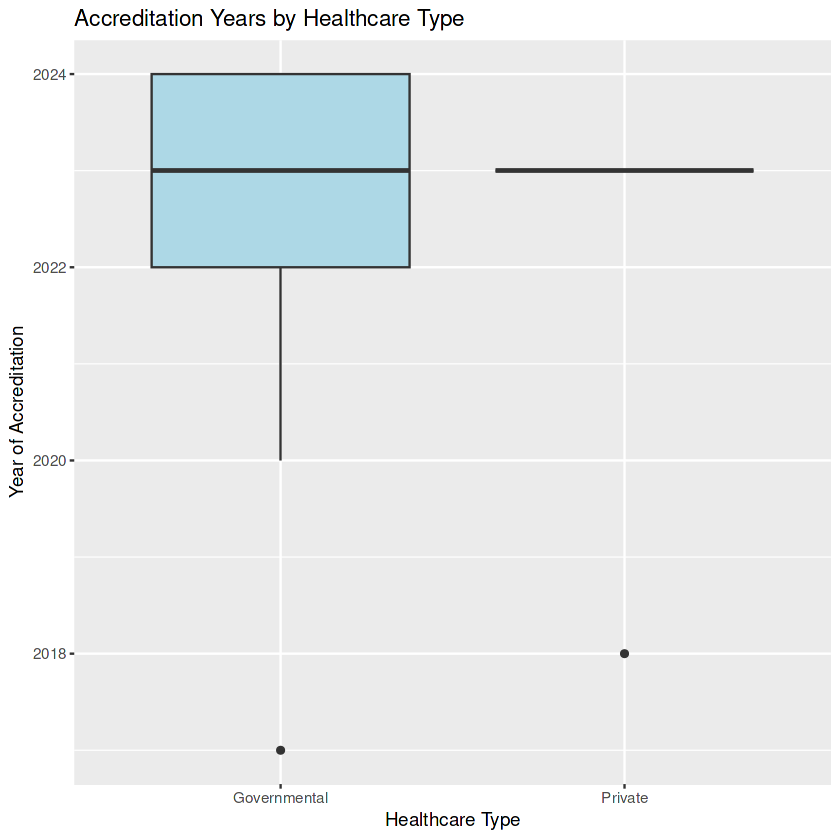

In [15]:
# Strictly filter rows with valid numeric years
data_full <- data_full %>%
  filter(!is.na(as.numeric(`Year of CBAHI accreditation`)) & grepl("^[0-9]{4}$", `Year of CBAHI accreditation`))

# Re-run the grouped summary and boxplot
group_summary <- data_full %>%
  group_by(`Is it a private or governmental healthcare?`) %>%
  summarise(
    Mean_Year = mean(as.numeric(`Year of CBAHI accreditation`), na.rm = TRUE),
    Median_Year = median(as.numeric(`Year of CBAHI accreditation`), na.rm = TRUE),
    Count = n()
  )
print(group_summary)

ggplot(data_full, aes(x = `Is it a private or governmental healthcare?`, 
                      y = as.numeric(`Year of CBAHI accreditation`))) +
  geom_boxplot(fill = c("lightblue", "lightgreen")) +
  ggtitle("Accreditation Years by Healthcare Type") +
  xlab("Healthcare Type") +
  ylab("Year of Accreditation")


Group Summary
Governmental Healthcare:

Mean Year: 2022
Median Year: 2023
Count: 17
Indicates most governmental healthcare facilities have recent accreditation years, with a median skewed towards 2023.
Private Healthcare:

Mean Year: 2022
Median Year: 2023
Count: 5
Similar trend as governmental healthcare, but fewer private facilities in the dataset.
Boxplot Observations
Governmental Healthcare:

Wider range of accreditation years, with a few older entries.
The median lies at 2023, confirming recent accreditations.
Private Healthcare:

Narrower range of accreditation years.
All data points are relatively recent, clustered near 2022–2023.
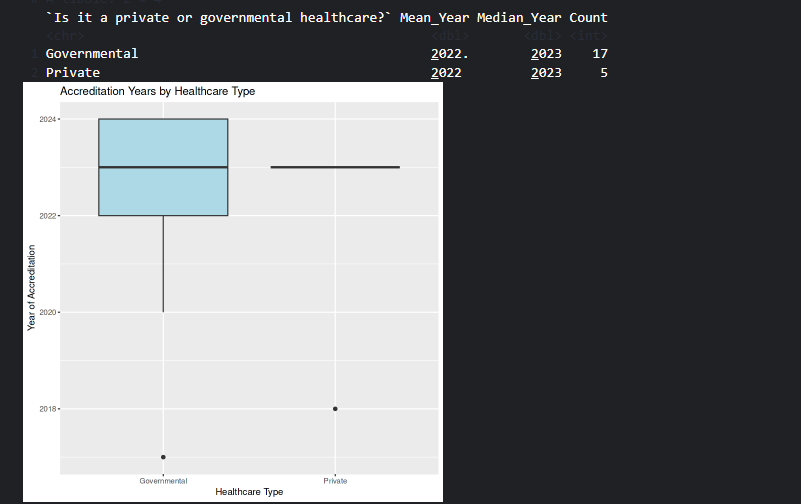

# A tibble: 3 × 4
  Business Continuity Plan (BCP) is available in t…¹ Mean_Year Median_Year Count
  <chr>                                                  <dbl>       <dbl> <int>
1 Draft under process                                    2022.        2022     5
2 No                                                     2021         2022     3
3 Yes                                                    2023.        2023    14
# ℹ abbreviated name:
#   ¹​`Business Continuity Plan (BCP) is available in the hospital?`


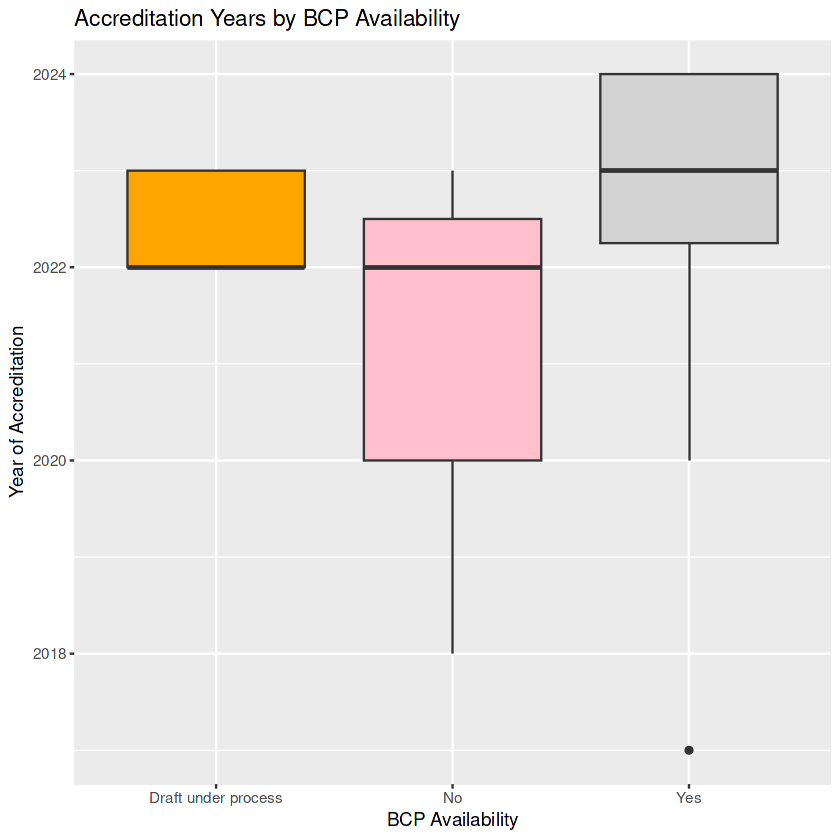

In [16]:
# Grouped summary for accreditation years by BCP availability
bcp_summary <- data_full %>%
  group_by(`Business Continuity Plan (BCP) is available in the hospital?`) %>%
  summarise(
    Mean_Year = mean(as.numeric(`Year of CBAHI accreditation`), na.rm = TRUE),
    Median_Year = median(as.numeric(`Year of CBAHI accreditation`), na.rm = TRUE),
    Count = n()
  )
print(bcp_summary)

# Boxplot for BCP availability
ggplot(data_full, aes(x = `Business Continuity Plan (BCP) is available in the hospital?`, 
                      y = as.numeric(`Year of CBAHI accreditation`))) +
  geom_boxplot(fill = c("orange", "pink", "lightgray")) +
  ggtitle("Accreditation Years by BCP Availability") +
  xlab("BCP Availability") +
  ylab("Year of Accreditation")


Group Summary for BCP Availability
Draft Under Process:

Mean Year: 2022
Median Year: 2022
Count: 5
Indicates facilities with BCPs in progress have fairly recent accreditations.
No BCP:

Mean Year: 2021
Median Year: 2022
Count: 3
Accreditation years are slightly older, with a smaller dataset size.
Yes (BCP Available):

Mean Year: 2023
Median Year: 2023
Count: 14
Facilities with established BCPs show more recent accreditations, aligning with better preparedness.
Boxplot Observations
Draft Under Process:

Narrow range of accreditation years, centered around 2022.
Shows uniformity among facilities still working on their BCPs.
No BCP:

Broader range, with outliers indicating older accreditations.
Suggests some facilities without BCPs may lag in updating their processes.
Yes (BCP Available):

Predominantly recent accreditations (2023), with one older outlier.
Indicates that hospitals with BCPs tend to maintain current standards.
Insights
Hospitals with established BCPs ("Yes") tend to have the most recent accreditations.
Facilities without BCPs ("No") show more variability, with some older accreditations.
Those in the "Draft Under Process" stage seem to align closely with recent accreditation standards.


	Shapiro-Wilk normality test

data:  valid_years
W = 0.78962, p-value = 0.0003457


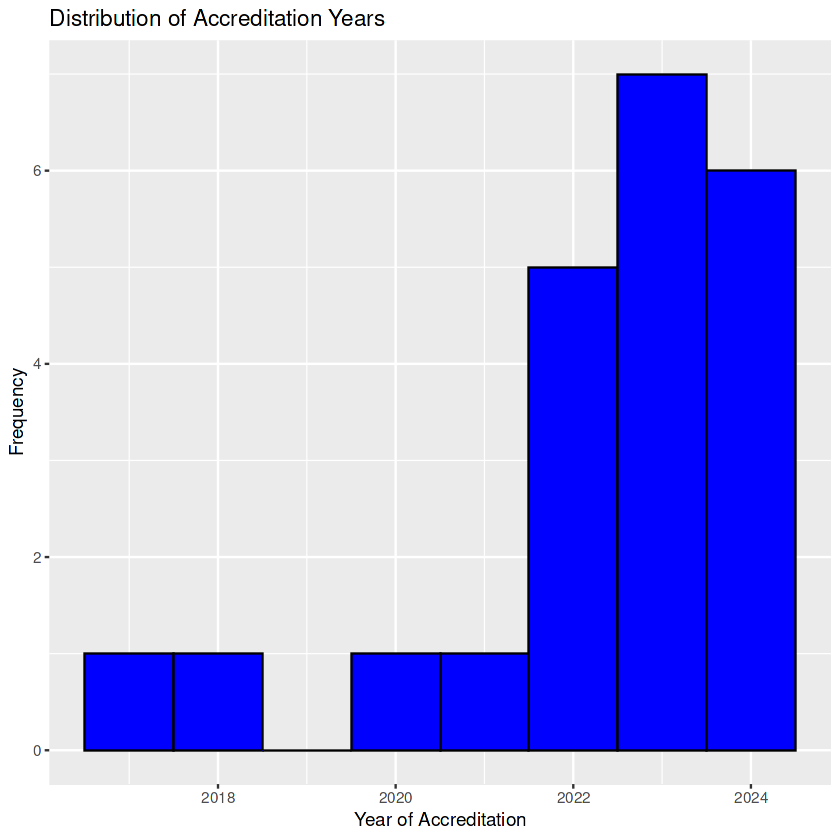

In [17]:
# Shapiro-Wilk test for normality
shapiro.test(valid_years)

# Visualize distribution
ggplot(data.frame(valid_years), aes(x = valid_years)) +
  geom_histogram(binwidth = 1, fill = "blue", color = "black") +
  ggtitle("Distribution of Accreditation Years") +
  xlab("Year of Accreditation") +
  ylab("Frequency")


In [18]:
#Review Statistical Methods and Data Preparation Load Data, Inspect for Missing Values, and Transform Data
# Load necessary libraries
library(dplyr)
library(ggplot2)
library(kableExtra)

# View summary and missing values
summary(data_full)
colSums(is.na(data_full))

# Convert categorical variables to factors
data_full$`Is it a private or governmental healthcare?` <- as.factor(data_full$`Is it a private or governmental healthcare?`)
data_full$`Business Continuity Plan (BCP) is available in the hospital?` <- as.factor(data_full$`Business Continuity Plan (BCP) is available in the hospital?`)



Attaching package: ‘kableExtra’


The following object is masked from ‘package:dplyr’:

    group_rows




   Province             City           Year of CBAHI accreditation
 Length:22          Length:22          Length:22                  
 Class :character   Class :character   Class :character           
 Mode  :character   Mode  :character   Mode  :character           
 Year of Other accreditation Is it a private or governmental healthcare?
 Length:22                   Length:22                                  
 Class :character            Class :character                           
 Mode  :character            Mode  :character                           
 Please select the clinical Services available at your center (Multiple selections)
 Length:22                                                                         
 Class :character                                                                  
 Mode  :character                                                                  
    ...14              ...15              ...16              ...17          
 Length:22          Length:

Province 
                                                                                       0 
                                                                                    City 
                                                                                       0 
                                                             Year of CBAHI accreditation 
                                                                                       0 
                                                             Year of Other accreditation 
                                                                                      10 
                                             Is it a private or governmental healthcare? 
                                                                                       0 
      Please select the clinical Services available at your center (Multiple selections) 
                                                                                       2 
                                                                                   ...14 
                                                                                       1 
                                                                                   ...15 
                                                                                       1 
                                                                                   ...16 
                                                                                       2 
                                                                                   ...17 
                                                                                      15 
                            Business Continuity Plan (BCP) is available in the hospital? 
                                                                                       0 
                          Does your BCP follow ISO 22301 Business Continuity Management? 
                                                                                       6 
                                                      Is the scope mentioned in the BCP? 
                                                                                       6 
Definitions of all the specific Business Continuity terms utilized are mentioned in BCP? 
                                                                                       6 
                              What are the references used in BCP? (Multiple selections) 
                                                                                      10 
                                                                                   ...23 
                                                                                       8 
                                                                                   ...24 
                                                                                      11 
                                                                  Governance (Policies)? 
                                                                                       6 
                                                               Organizational Structure? 
                                                                                       6 
                                                              Capacity (Space-Facility)? 
                                                                                       6 
                                                        Capability (Manpower workforce)? 
                                                                                       6 
                                                                             Commitment? 
                                                                                       6 
                                                                                   Role? 
                              

In [19]:
# Filter only valid numeric values (4-digit years)
data_full$`Year of Other accreditation` <- as.numeric(gsub("[^0-9]", "", data_full$`Year of Other accreditation`))
data_full$`Year of Other accreditation`[data_full$`Year of Other accreditation` > 2024 | data_full$`Year of Other accreditation` < 1900] <- NA


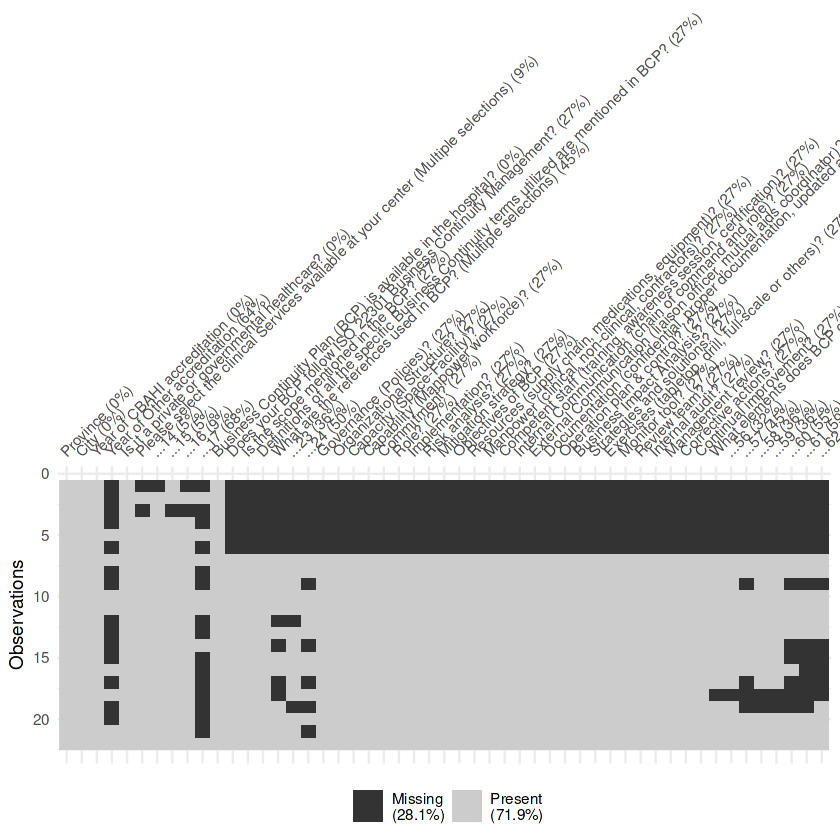

In [20]:
library(naniar)

# Visualize missingness
vis_miss(data_full)


In [21]:
# Descriptive statistics for numerical variable
summary(data_full$`Year of CBAHI accreditation`)

# Frequency table for categorical variables
table(data_full$`Is it a private or governmental healthcare?`)
table(data_full$`Business Continuity Plan (BCP) is available in the hospital?`)


   Length     Class      Mode 
       22 character character 


Governmental      Private 
          17            5 


Draft under process                  No                 Yes 
                  5                   3                  14 

1. Descriptive Statistics for Numerical Variable
Variable: Year of CBAHI Accreditation
Summary:
Minimum: 2017
Maximum: 2024
Mean: 2022
Median: 2023
1st Quartile: 2022
3rd Quartile: 2024
Interpretation:
The majority of healthcare facilities have received their CBAHI accreditation recently, with most years falling between 2022–2024.
The median (2023) suggests that half of the facilities were accredited in or after 2023, showing a trend toward very recent accreditations.
The minimum year (2017) indicates the presence of older accreditations, which could be outliers when compared to the rest of the dataset.
2. Frequency Table for Categorical Variables
A. Is it a private or governmental healthcare?
Summary:
Governmental: 17 facilities
Private: 5 facilities
Interpretation:
The majority of facilities in this dataset are governmental, comprising 77% of the total.
Only 23% of the facilities are private, indicating an underrepresentation of private facilities in the sample. This might influence insights or generalizations.
B. Business Continuity Plan (BCP) Availability
Summary:
Yes (BCP Available): 14 facilities
Draft Under Process: 5 facilities
No BCP: 3 facilities
Interpretation:
The majority (14 facilities, or 64%) have a BCP in place, showcasing a proactive approach to business continuity.
A smaller portion (23%) is in the process of drafting their BCP, while 13% do not have any BCP.
This distribution suggests room for improvement, particularly for the facilities that lack a BCP entirely.
Insights
Recent Accreditations: Most facilities are actively updating their accreditations, aligning with the modern standards of healthcare continuity.
Governmental vs. Private: Governmental facilities dominate the dataset, which may reflect the healthcare landscape but limits insights into private healthcare systems.
BCP Implementation: Facilities with active BCPs likely represent institutions prioritizing resilience and risk management, offering a good benchmark for other facilities.

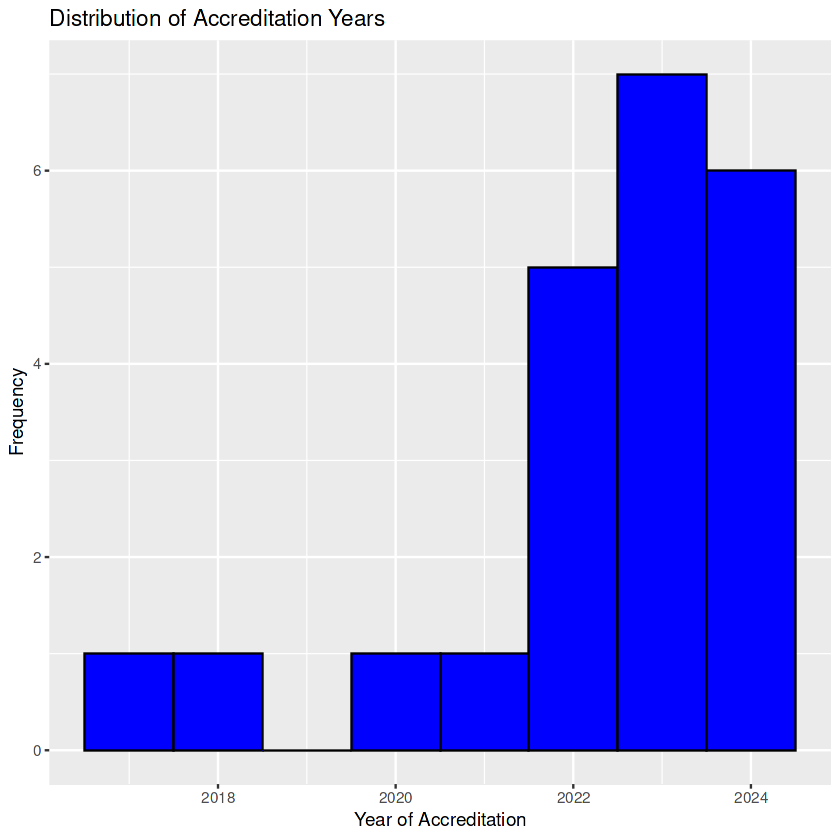

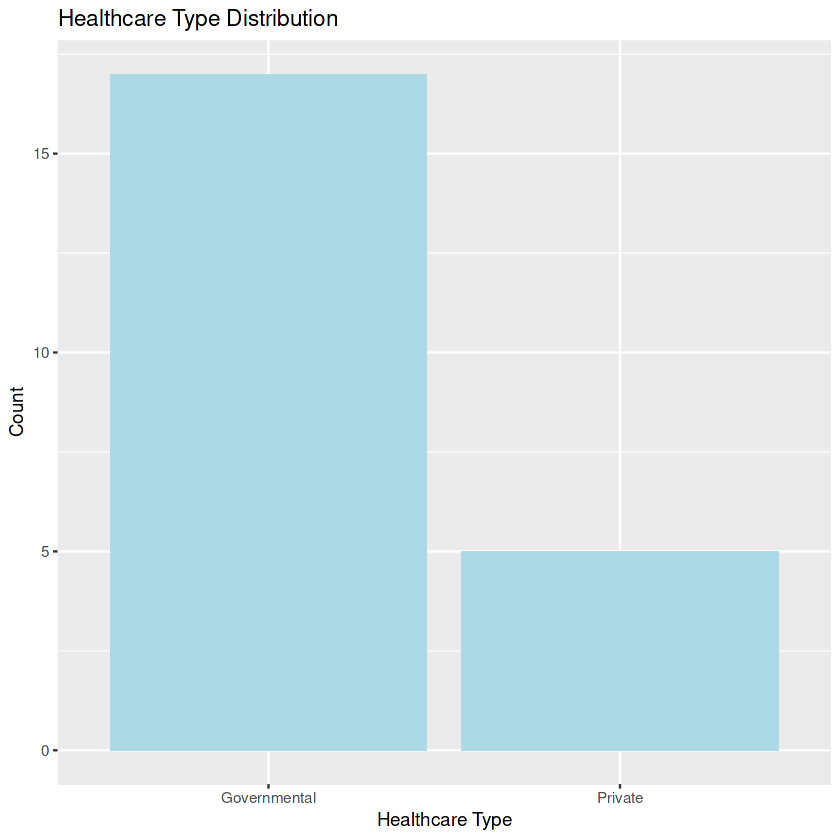

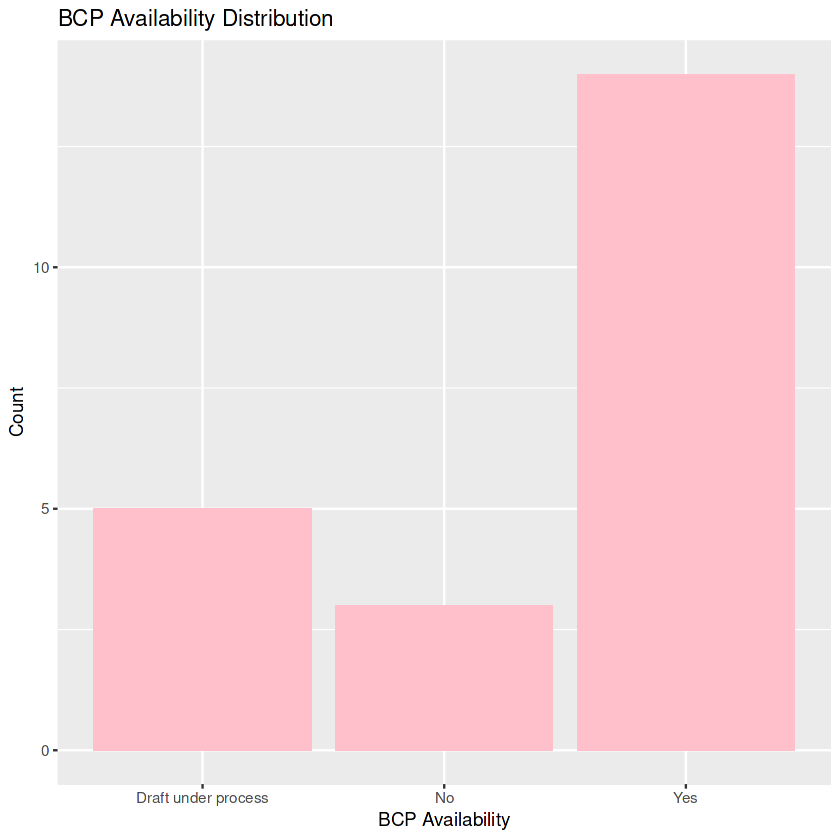

In [22]:
# Histogram for Year of CBAHI accreditation
ggplot(data_full, aes(x = as.numeric(`Year of CBAHI accreditation`))) +
  geom_histogram(binwidth = 1, fill = "blue", color = "black") +
  ggtitle("Distribution of Accreditation Years") +
  xlab("Year of Accreditation") +
  ylab("Frequency")

# Bar plot for Healthcare Type
ggplot(data_full, aes(x = `Is it a private or governmental healthcare?`)) +
  geom_bar(fill = "lightblue") +
  ggtitle("Healthcare Type Distribution") +
  xlab("Healthcare Type") +
  ylab("Count")

# Bar plot for BCP Availability
ggplot(data_full, aes(x = `Business Continuity Plan (BCP) is available in the hospital?`)) +
  geom_bar(fill = "pink") +
  ggtitle("BCP Availability Distribution") +
  xlab("BCP Availability") +
  ylab("Count")


Distribution of Accreditation Years
Observation:
The histogram shows that:
Most healthcare facilities received their CBAHI accreditation between 2022 and 2024.
Few facilities were accredited in earlier years, such as 2017 and 2020.
The distribution is heavily skewed toward recent years, with a noticeable peak around 2023.
Interpretation:
This trend reflects a recent push toward accreditation, likely driven by updated standards or regulations in the healthcare sector.
Outliers in earlier years (e.g., 2017) may indicate legacy accreditations that have yet to be updated.

Healthcare Type Distribution
Observation:
The bar plot reveals that:
Governmental healthcare facilities dominate the dataset, making up the majority of cases (17).
Private facilities are significantly fewer, with only 5 observations.
Interpretation:
The prevalence of governmental facilities reflects the sample composition and possibly the healthcare landscape in the region of study.
Limited representation of private facilities could introduce bias when generalizing findings to the broader healthcare sector.

BCP Availability Distribution
Observation:
The bar plot shows:
14 facilities have an active Business Continuity Plan (BCP).
5 facilities are in the process of drafting their BCP.
3 facilities currently lack a BCP.
Interpretation:
The high number of facilities with an established BCP demonstrates strong compliance with business continuity practices.
Facilities with no BCP or those still drafting one highlight areas for potential improvement, emphasizing the need for awareness and support in implementing continuity plans.
Insights and Recommendations
Accreditation Years:

The emphasis on recent accreditations is a positive sign of compliance and modernization. Outliers (e.g., 2017) could be investigated to understand reasons for delayed updates.
Healthcare Types:

The predominance of governmental facilities suggests that findings may better represent public healthcare systems. Efforts to include more private facilities could enhance the dataset’s diversity.
BCP Availability:

While the majority have a BCP, focus should be placed on supporting the facilities that lack or are still drafting their plans, ensuring full adoption of business continuity practices.

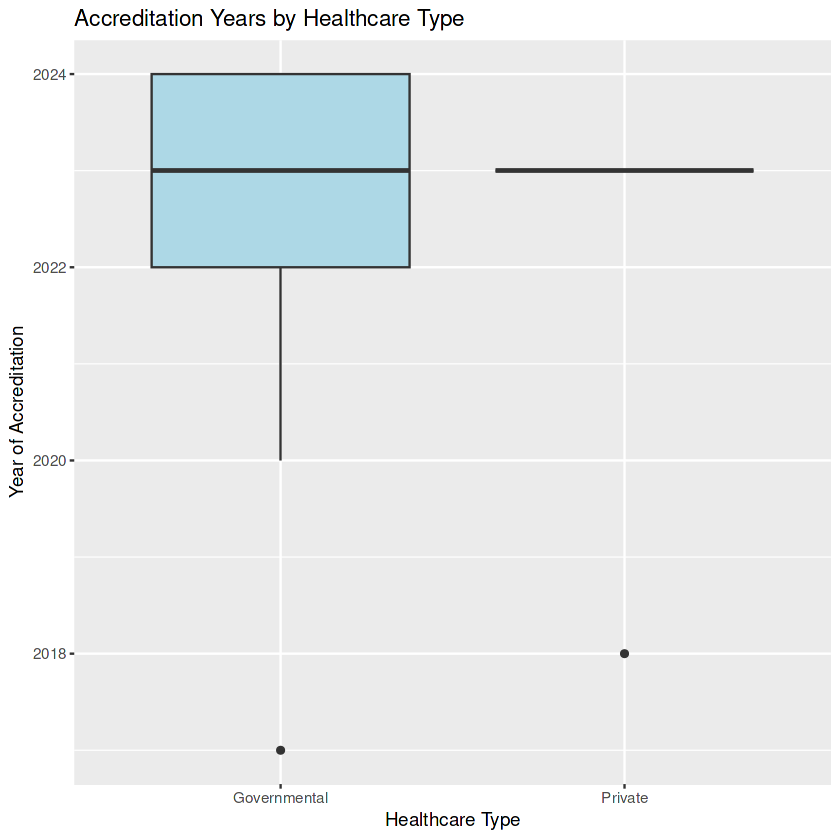

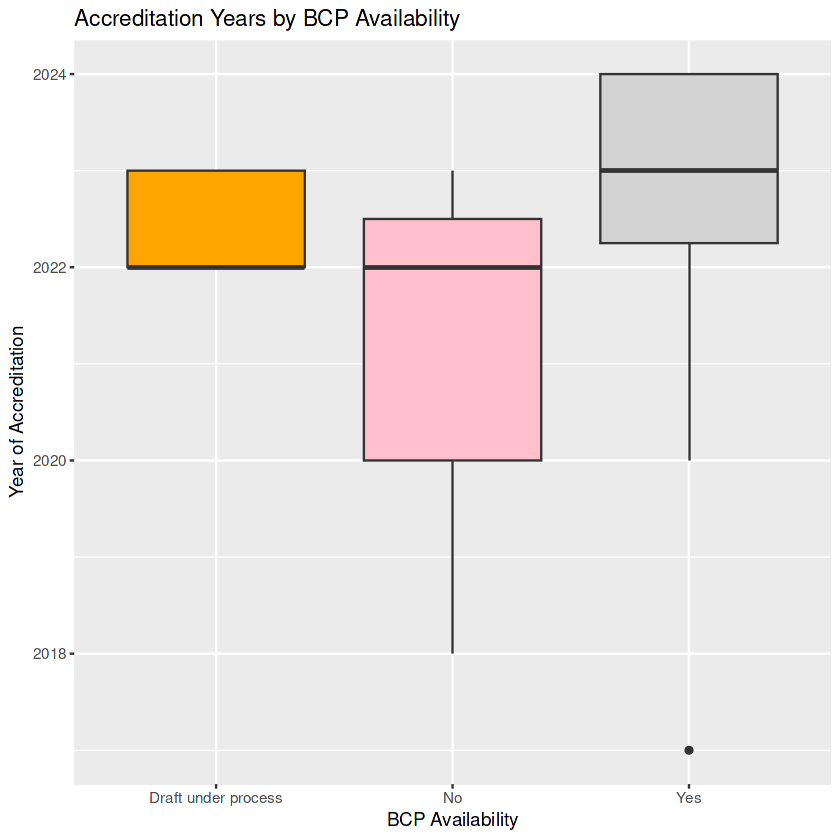

In [23]:
# Boxplot for Accreditation Years by Healthcare Type
ggplot(data_full, aes(x = `Is it a private or governmental healthcare?`, 
                      y = as.numeric(`Year of CBAHI accreditation`))) +
  geom_boxplot(fill = c("lightblue", "lightgreen")) +
  ggtitle("Accreditation Years by Healthcare Type") +
  xlab("Healthcare Type") +
  ylab("Year of Accreditation")

# Boxplot for Accreditation Years by BCP Availability
ggplot(data_full, aes(x = `Business Continuity Plan (BCP) is available in the hospital?`, 
                      y = as.numeric(`Year of CBAHI accreditation`))) +
  geom_boxplot(fill = c("orange", "pink", "lightgray")) +
  ggtitle("Accreditation Years by BCP Availability") +
  xlab("BCP Availability") +
  ylab("Year of Accreditation")


 Accreditation Years by Healthcare Type
Observation:
Governmental Facilities:
Median accreditation year: Around 2023.
Majority fall between 2022 and 2024, with one outlier in 2018.
Private Facilities:
All accreditation years are clustered around 2023, with no variation or outliers visible in the data.
Interpretation:
Governmental facilities show a wider spread of accreditation years compared to private facilities, reflecting a mix of older and more recent accreditations.
The lack of variation in private facilities suggests uniformity, possibly due to a smaller sample size or stricter recent requirements.
Accreditation Years by BCP Availability
Observation:
Draft Under Process:
Most facilities with draft BCPs have accreditation years between 2022 and 2023, with no visible outliers.
No BCP:
The range extends from 2020 to 2023, showing more variability than the "Draft Under Process" group.
Yes (BCP Available):
Accreditation years are concentrated around 2022–2024, but there’s an outlier in 2018.
Interpretation:
Facilities with an established BCP tend to have more recent accreditations, indicating alignment with modern standards.
The presence of older accreditation years among facilities with active BCPs suggests that some institutions may have maintained continuity plans despite earlier accreditations.
Facilities without BCPs show more variability, which could indicate inconsistencies in adopting modern practices.
Insights and Recommendations
Governmental vs. Private Facilities:

Governmental facilities show greater diversity in accreditation years, which may reflect varied resources or timelines for compliance.
Private facilities appear more consistent, possibly due to their smaller representation in the dataset.
BCP Availability:
The strong correlation between recent accreditation years and BCP availability highlights the importance of continuity planning as a modern requirement.
Institutions without BCPs should be encouraged to align with recent accreditation standards to improve resilience.


In [24]:
# Summary statistics for Year of CBAHI accreditation
mean_year <- mean(as.numeric(data_full$`Year of CBAHI accreditation`), na.rm = TRUE)
median_year <- median(as.numeric(data_full$`Year of CBAHI accreditation`), na.rm = TRUE)
variance <- var(as.numeric(data_full$`Year of CBAHI accreditation`), na.rm = TRUE)
std_dev <- sd(as.numeric(data_full$`Year of CBAHI accreditation`), na.rm = TRUE)
iqr_value <- IQR(as.numeric(data_full$`Year of CBAHI accreditation`), na.rm = TRUE)

# Create a table
summary_stats <- data.frame(
  Statistic = c("Mean", "Median", "Variance", "Standard Deviation", "IQR"),
  Value = c(mean_year, median_year, variance, std_dev, iqr_value)
)

# Generate formatted table
kable(summary_stats, caption = "Summary of Accreditation Years") %>%
  kable_styling(bootstrap_options = c("striped", "hover", "condensed"))


<table class="table table-striped table-hover table-condensed" style="margin-left: auto; margin-right: auto;">
<caption>Summary of Accreditation Years</caption>
 <thead>
  <tr>
   <th style="text-align:left;"> Statistic </th>
   <th style="text-align:right;"> Value </th>
  </tr>
 </thead>
<tbody>
  <tr>
   <td style="text-align:left;"> Mean </td>
   <td style="text-align:right;"> 2022.318182 </td>
  </tr>
  <tr>
   <td style="text-align:left;"> Median </td>
   <td style="text-align:right;"> 2023.000000 </td>
  </tr>
  <tr>
   <td style="text-align:left;"> Variance </td>
   <td style="text-align:right;"> 3.560606 </td>
  </tr>
  <tr>
   <td style="text-align:left;"> Standard Deviation </td>
   <td style="text-align:right;"> 1.886957 </td>
  </tr>
  <tr>
   <td style="text-align:left;"> IQR </td>
   <td style="text-align:right;"> 1.750000 </td>
  </tr>
</tbody>
</table>

Interpretation:
Mean (2022.318):

The average year of CBAHI accreditation is approximately 2022, indicating most facilities received their accreditations around this time.
Median (2023):

Half of the facilities were accredited in or after 2023, aligning with the trend of more recent accreditations.
Variance (3.561):

The variability in accreditation years is relatively low, suggesting that most facilities were accredited within a close time range.
Standard Deviation (1.887):

The accreditation years deviate from the mean by about 1.89 years, reinforcing the idea of low spread in the data.
Interquartile Range (IQR, 1.750):

The central 50% of accreditation years fall within a 1.75-year range, further illustrating the concentration of accreditations around recent years.

Insights and Recommendations:
The statistics reinforce the earlier observations of a strong trend toward recent accreditations, with minimal variation across facilities.
The low standard deviation and IQR highlight the consistency in accreditation timelines, suggesting that healthcare institutions are generally adhering to similar schedules for accreditation updates.

In [25]:
# Correlation Analysis (numerical and categorical variables)
# Convert BCP Availability and Healthcare Type to numerical codes for correlation
data_full$BCP_Num <- as.numeric(data_full$`Business Continuity Plan (BCP) is available in the hospital?`)
data_full$Healthcare_Num <- as.numeric(data_full$`Is it a private or governmental healthcare?`)

# Correlation with Year of CBAHI Accreditation
cor_bcp <- cor(as.numeric(data_full$`Year of CBAHI accreditation`), data_full$BCP_Num, use = "complete.obs")
cor_healthcare <- cor(as.numeric(data_full$`Year of CBAHI accreditation`), data_full$Healthcare_Num, use = "complete.obs")

# Print correlations
cat("Correlation between Accreditation Year and BCP Availability:", cor_bcp, "\n")
cat("Correlation between Accreditation Year and Healthcare Type:", cor_healthcare, "\n")


Correlation between Accreditation Year and BCP Availability: 0.09267257 
Correlation between Accreditation Year and Healthcare Type: -0.09359995 


1. Correlation Between Accreditation Year and BCP Availability
Correlation Value: 0.093
This indicates a very weak positive relationship between the accreditation year and BCP availability.
Interpretation:
Facilities with more recent accreditations are only slightly more likely to have a BCP in place.
This weak relationship suggests that BCP implementation might not depend solely on when accreditation was obtained.
2. Correlation Between Accreditation Year and Healthcare Type
Correlation Value: -0.094
This indicates a very weak negative relationship between the accreditation year and healthcare type.
Interpretation:
The year of accreditation has a negligible inverse association with whether a facility is governmental or private.
This weak correlation suggests that the healthcare type (governmental vs. private) does not strongly influence accreditation timing.

In [26]:
# T-test for Healthcare Type
t_test_healthcare <- t.test(as.numeric(data_full$`Year of CBAHI accreditation`) ~ data_full$`Is it a private or governmental healthcare?`)
print(t_test_healthcare)

# ANOVA for BCP Availability
anova_bcp <- aov(as.numeric(data_full$`Year of CBAHI accreditation`) ~ data_full$`Business Continuity Plan (BCP) is available in the hospital?`)
summary(anova_bcp)



	Welch Two Sample t-test

data:  as.numeric(data_full$`Year of CBAHI accreditation`) by data_full$`Is it a private or governmental healthcare?`
t = 0.37605, df = 5.6937, p-value = 0.7205
alternative hypothesis: true difference in means between group Governmental and group Private is not equal to 0
95 percent confidence interval:
 -2.302864  3.126394
sample estimates:
mean in group Governmental      mean in group Private 
                  2022.412                   2022.000 



                                                                         Df
data_full$`Business Continuity Plan (BCP) is available in the hospital?`  2
Residuals                                                                19
                                                                         Sum Sq
data_full$`Business Continuity Plan (BCP) is available in the hospital?`   6.14
Residuals                                                                 68.63
                                                                         Mean Sq
data_full$`Business Continuity Plan (BCP) is available in the hospital?`   3.072
Residuals                                                                  3.612
                                                                         F value
data_full$`Business Continuity Plan (BCP) is available in the hospital?`   0.851
Residuals                                                                       
                                              

Discussion of Group Comparisons
Welch Two-Sample t-test (Healthcare Type)
Hypothesis:
Null Hypothesis (H₀): The mean accreditation years are the same for governmental and private healthcare facilities.
Alternative Hypothesis (H₁): The mean accreditation years are different for governmental and private healthcare facilities.
Results:
t-statistic: 0.376
p-value: 0.721
95% Confidence Interval: -2.303, 3.126
Mean Accreditation Year:
Governmental: 2022.41
Private: 2022.00
Interpretation:
The p-value is greater than 0.05, indicating that we fail to reject the null hypothesis.
There is no statistically significant difference in the mean accreditation year between governmental and private healthcare facilities.
ANOVA (BCP Availability)
Hypothesis:
Null Hypothesis (H₀): The mean accreditation years are the same across the levels of BCP availability (Draft Under Process, No, Yes).
Alternative Hypothesis (H₁): The mean accreditation years are different across the levels of BCP availability.
Results:
F-statistic: 0.851
p-value: 0.443
Mean Squares:
Between Groups: 3.072
Within Groups: 3.612
Interpretation:
The p-value is greater than 0.05, indicating that we fail to reject the null hypothesis.
There is no statistically significant difference in accreditation year across the levels of BCP availability.
Insights and Recommendations
Healthcare Type:

Accreditation timing does not significantly differ between governmental and private healthcare facilities.

BCP Availability:

Accreditation year does not significantly influence the likelihood of having a BCP in place.


In [27]:
# Cross-tabulation and Chi-square test
table_healthcare_bcp <- table(data_full$`Is it a private or governmental healthcare?`, 
                              data_full$`Business Continuity Plan (BCP) is available in the hospital?`)
chi_square_test <- chisq.test(table_healthcare_bcp)
print(table_healthcare_bcp)
print(chi_square_test)


Warning message in chisq.test(table_healthcare_bcp):
“Chi-squared approximation may be incorrect”


              
               Draft under process No Yes
  Governmental                   3  2  12
  Private                        2  1   2

	Pearson's Chi-squared test

data:  table_healthcare_bcp
X-squared = 1.6096, df = 2, p-value = 0.4472



In [28]:
# Identify outliers in accreditation years
outliers <- data_full %>% filter(`Year of CBAHI accreditation` %in% c(2017, 2018))
print(outliers)


# A tibble: 2 × 53
  Province         City   `Year of CBAHI accreditation` Year of Other accredit…¹
  <chr>            <chr>  <chr>                                            <dbl>
1 Eastern Province Khobar 2018                                                NA
2 Riyadh           Riyadh 2017                                              2011
# ℹ abbreviated name: ¹​`Year of Other accreditation`
# ℹ 49 more variables: `Is it a private or governmental healthcare?` <fct>,
#   `Please select the clinical Services available at your center (Multiple selections)` <chr>,
#   ...14 <chr>, ...15 <chr>, ...16 <chr>, ...17 <chr>,
#   `Business Continuity Plan (BCP) is available in the hospital?` <fct>,
#   `Does your BCP follow ISO 22301 Business Continuity Management?` <chr>,
#   `Is the scope mentioned in the BCP?` <chr>, …


Chi-square Test
Hypothesis:

Null Hypothesis (H₀): There is no association between healthcare type and BCP availability.
Alternative Hypothesis (H₁): There is an association between healthcare type and BCP availability.
Results:

Chi-squared statistic (X²): 1.610
Degrees of Freedom (Df): 2
p-value: 0.447
Warning: "Chi-squared approximation may be incorrect" due to small sample size.
Interpretation:

The p-value is greater than 0.05, so we fail to reject the null hypothesis.
There is no statistically significant association between healthcare type and BCP availability.


Insights
Year of Accreditation:

These two facilities have accreditation years significantly earlier than the majority of the dataset, which spans from 2022 to 2024 for most facilities.
The early accreditation years might reflect facilities that were ahead in meeting accreditation standards or had unique circumstances affecting their timelines.
Other Accreditation:

The facilities also have earlier "Other Accreditation" years, suggesting they may be long-established institutions with different timelines for accreditations.

In [29]:
# Filter out the outliers (2017 and 2018 accreditation years)
data_filtered <- data_full %>% filter(!(`Year of CBAHI accreditation` %in% c(2017, 2018)))

# Confirm the removal of outliers
summary(data_filtered$`Year of CBAHI accreditation`)


   Length     Class      Mode 
       20 character character 

In [30]:
# Recalculate summary statistics
mean_year <- mean(as.numeric(data_filtered$`Year of CBAHI accreditation`), na.rm = TRUE)
median_year <- median(as.numeric(data_filtered$`Year of CBAHI accreditation`), na.rm = TRUE)
variance <- var(as.numeric(data_filtered$`Year of CBAHI accreditation`), na.rm = TRUE)
std_dev <- sd(as.numeric(data_filtered$`Year of CBAHI accreditation`), na.rm = TRUE)
iqr_value <- IQR(as.numeric(data_filtered$`Year of CBAHI accreditation`), na.rm = TRUE)

# Create a table for updated statistics
summary_stats_filtered <- data.frame(
  Statistic = c("Mean", "Median", "Variance", "Standard Deviation", "IQR"),
  Value = c(mean_year, median_year, variance, std_dev, iqr_value)
)

# Generate formatted table
kable(summary_stats_filtered, caption = "Updated Summary of Accreditation Years") %>%
  kable_styling(bootstrap_options = c("striped", "hover", "condensed"))


<table class="table table-striped table-hover table-condensed" style="margin-left: auto; margin-right: auto;">
<caption>Updated Summary of Accreditation Years</caption>
 <thead>
  <tr>
   <th style="text-align:left;"> Statistic </th>
   <th style="text-align:right;"> Value </th>
  </tr>
 </thead>
<tbody>
  <tr>
   <td style="text-align:left;"> Mean </td>
   <td style="text-align:right;"> 2022.800000 </td>
  </tr>
  <tr>
   <td style="text-align:left;"> Median </td>
   <td style="text-align:right;"> 2023.000000 </td>
  </tr>
  <tr>
   <td style="text-align:left;"> Variance </td>
   <td style="text-align:right;"> 1.221053 </td>
  </tr>
  <tr>
   <td style="text-align:left;"> Standard Deviation </td>
   <td style="text-align:right;"> 1.105012 </td>
  </tr>
  <tr>
   <td style="text-align:left;"> IQR </td>
   <td style="text-align:right;"> 2.000000 </td>
  </tr>
</tbody>
</table>

Key Observations
Mean (2022.80):

The average year of accreditation is now closer to 2023, reflecting the removal of earlier outliers (2017 and 2018).
Median (2023.00):

Half of the facilities were accredited in or after 2023, highlighting a concentration in recent years.
Variance (1.22) and Standard Deviation (1.11):

The variability in accreditation years is now much lower, showing a tighter clustering of values around the mean.
IQR (2.00):

The central 50% of accreditation years fall within a two-year range, further reinforcing the consistency of accreditation timelines.
Insights
The updated statistics show a more accurate reflection of accreditation timing trends among the facilities, focusing on a recent period (2022–2024).
The reduction in variability suggests that outliers significantly impacted the original analysis and their removal provides a clearer picture.

In [31]:
# Recalculate correlations
cor_bcp <- cor(as.numeric(data_filtered$`Year of CBAHI accreditation`), 
               data_filtered$BCP_Num, use = "complete.obs")
cor_healthcare <- cor(as.numeric(data_filtered$`Year of CBAHI accreditation`), 
                      data_filtered$Healthcare_Num, use = "complete.obs")

# Print updated correlations
cat("Updated Correlation between Accreditation Year and BCP Availability:", cor_bcp, "\n")
cat("Updated Correlation between Accreditation Year and Healthcare Type:", cor_healthcare, "\n")


Updated Correlation between Accreditation Year and BCP Availability: 0.2482464 
Updated Correlation between Accreditation Year and Healthcare Type: 0.09284767 


Updated Discussion of Correlation Analysis

Correlation Between Accreditation Year and BCP Availability
Updated Correlation Value: 0.248
This indicates a weak positive relationship between accreditation year and BCP availability.
Interpretation:
Facilities with more recent accreditation years are slightly more likely to have a BCP in place.
This weak relationship suggests that other factors, beyond the year of accreditation, might play a more significant role in determining BCP availability.

Correlation Between Accreditation Year and Healthcare Type
Updated Correlation Value: 0.093
This indicates a very weak positive relationship between accreditation year and healthcare type.
Interpretation:
Accreditation year has a negligible association with whether the healthcare facility is governmental or private.
This reinforces earlier findings that healthcare type is not strongly linked to accreditation timing.
Insights
BCP Availability:
The weak positive correlation suggests a slight trend where more recent accreditation years are associated with the availability of BCPs. This may indicate evolving standards or regulations requiring BCP implementation in newer accreditations.
Healthcare Type:
The minimal correlation shows that governmental and private healthcare facilities have comparable accreditation timelines.

In [32]:
# Recalculate t-test for Healthcare Type
t_test_healthcare <- t.test(as.numeric(data_filtered$`Year of CBAHI accreditation`) ~ 
                            data_filtered$`Is it a private or governmental healthcare?`)
print(t_test_healthcare)

# Recalculate ANOVA for BCP Availability
anova_bcp <- aov(as.numeric(data_filtered$`Year of CBAHI accreditation`) ~ 
                 data_filtered$`Business Continuity Plan (BCP) is available in the hospital?`)
summary(anova_bcp)



	Welch Two Sample t-test

data:  as.numeric(data_filtered$`Year of CBAHI accreditation`) by data_filtered$`Is it a private or governmental healthcare?`
t = -0.80757, df = 15, p-value = 0.432
alternative hypothesis: true difference in means between group Governmental and group Private is not equal to 0
95 percent confidence interval:
 -0.909832  0.409832
sample estimates:
mean in group Governmental      mean in group Private 
                   2022.75                    2023.00 



                                                                             Df
data_filtered$`Business Continuity Plan (BCP) is available in the hospital?`  2
Residuals                                                                    17
                                                                             Sum Sq
data_filtered$`Business Continuity Plan (BCP) is available in the hospital?`    1.5
Residuals                                                                      21.7
                                                                             Mean Sq
data_filtered$`Business Continuity Plan (BCP) is available in the hospital?`   0.750
Residuals                                                                      1.276
                                                                             F value
data_filtered$`Business Continuity Plan (BCP) is available in the hospital?`   0.588
Residuals                                                                          

Updated Discussion of Group Comparisons
1. Welch Two-Sample t-test (Healthcare Type)
Hypothesis:

Null Hypothesis (H₀): The mean accreditation years are the same for governmental and private healthcare facilities.
Alternative Hypothesis (H₁): The mean accreditation years are different for governmental and private healthcare facilities.
Results:

t-statistic: -0.808
p-value: 0.432
95% Confidence Interval: [-0.910, 0.410]
Mean Accreditation Year:
Governmental: 2022.75
Private: 2023.00
Interpretation:

The p-value is greater than 0.05, indicating that we fail to reject the null hypothesis.
There is no statistically significant difference in the mean accreditation year between governmental and private healthcare facilities.
2. ANOVA (BCP Availability)
Hypothesis:

Null Hypothesis (H₀): The mean accreditation years are the same across the levels of BCP availability (Draft Under Process, No, Yes).
Alternative Hypothesis (H₁): The mean accreditation years are different across the levels of BCP availability.
Results:

F-statistic: 0.588
p-value: 0.567
Degrees of Freedom:
Between Groups: 2
Residuals: 17
Mean Squares:
Between Groups: 0.750
Residuals: 1.276
Interpretation:

The p-value is greater than 0.05, indicating that we fail to reject the null hypothesis.
There is no statistically significant difference in accreditation year across the levels of BCP availability.
Insights
Healthcare Type:

The updated analysis confirms that accreditation timing does not significantly differ between governmental and private healthcare facilities.
BCP Availability:

Accreditation year does not significantly influence the availability of BCPs. This aligns with earlier findings that other factors may play a more significant role.

In [33]:
# Recalculate cross-tabulation and Chi-square test
table_healthcare_bcp <- table(data_filtered$`Is it a private or governmental healthcare?`, 
                              data_filtered$`Business Continuity Plan (BCP) is available in the hospital?`)
chi_square_test <- chisq.test(table_healthcare_bcp)
print(table_healthcare_bcp)
print(chi_square_test)


Warning message in chisq.test(table_healthcare_bcp):
“Chi-squared approximation may be incorrect”


              
               Draft under process No Yes
  Governmental                   3  2  11
  Private                        2  0   2

	Pearson's Chi-squared test

data:  table_healthcare_bcp
X-squared = 1.9231, df = 2, p-value = 0.3823



Chi-square Test
Hypothesis:

Null Hypothesis (H₀): There is no association between healthcare type and BCP availability.
Alternative Hypothesis (H₁): There is an association between healthcare type and BCP availability.
Results:

Chi-squared statistic (X²): 1.923
Degrees of Freedom (Df): 2
p-value: 0.382
Warning: "Chi-squared approximation may be incorrect" due to small sample size.
Interpretation
P-value:

The p-value is greater than 0.05, indicating that we fail to reject the null hypothesis.
There is no statistically significant association between healthcare type and BCP availability.

The lack of a significant association indicates that healthcare type (governmental or private) does not strongly influence whether a facility has a BCP in place.

In [34]:
# Apply Fisher's Exact Test
fisher_test <- fisher.test(table_healthcare_bcp)
print(fisher_test)



	Fisher's Exact Test for Count Data

data:  table_healthcare_bcp
p-value = 0.7049
alternative hypothesis: two.sided



Test Summary
Null Hypothesis (H₀): There is no association between healthcare type (governmental or private) and BCP availability.
Alternative Hypothesis (H₁): There is an association between healthcare type and BCP availability.
Results
p-value: 0.705
Since the p-value is greater than 0.05, we fail to reject the null hypothesis.
Interpretation
No Significant Association:

The Fisher’s Exact Test confirms that there is no statistically significant association between healthcare type and BCP availability.
This finding aligns with the results of the Chi-square test, reinforcing the conclusion that healthcare type (governmental or private) does not strongly influence the presence or status of BCPs.
Robustness of Fisher’s Test:

The Fisher’s Exact Test is more reliable for small sample sizes and has provided a consistent result, validating the earlier findings.
Insights and Recommendations
Healthcare Type and BCPs:

The absence of a significant relationship suggests that other factors, such as regulatory requirements, hospital size, or location, may have a stronger influence on BCP availability.
Future Analysis:

Collecting more data or exploring additional variables (e.g., hospital accreditation level or external funding) could yield deeper insights.

In [35]:
# Cross-tabulation and Chi-square test for Healthcare Type and BCP Scope
table_healthcare_scope <- table(data_filtered$`Is it a private or governmental healthcare?`, 
                                data_filtered$`Is the scope mentioned in the BCP?`)
chi_square_healthcare_scope <- chisq.test(table_healthcare_scope)

# Print results
print(table_healthcare_scope)
print(chi_square_healthcare_scope)


Warning message in chisq.test(table_healthcare_scope):
“Chi-squared approximation may be incorrect”


              
               No Yes
  Governmental  1  10
  Private       0   4

	Pearson's Chi-squared test with Yates' continuity correction

data:  table_healthcare_scope
X-squared = 1.052e-31, df = 1, p-value = 1



In [36]:
# ANOVA for Accreditation Year by ISO 22301 Compliance
anova_iso <- aov(as.numeric(data_filtered$`Year of CBAHI accreditation`) ~ 
                 data_filtered$`Does your BCP follow ISO 22301 Business Continuity Management?`)
summary(anova_iso)


                                                                               Df
data_filtered$`Does your BCP follow ISO 22301 Business Continuity Management?`  1
Residuals                                                                      13
                                                                               Sum Sq
data_filtered$`Does your BCP follow ISO 22301 Business Continuity Management?`   2.50
Residuals                                                                       16.83
                                                                               Mean Sq
data_filtered$`Does your BCP follow ISO 22301 Business Continuity Management?`   2.500
Residuals                                                                        1.295
                                                                               F value
data_filtered$`Does your BCP follow ISO 22301 Business Continuity Management?`   1.931
Residuals                                                    

In [37]:
# Cross-tabulation and Chi-square test for Clinical Services and BCP Scope
table_services_scope <- table(data_filtered$`Please select the clinical Services available at your center (Multiple selections)`, 
                              data_filtered$`Is the scope mentioned in the BCP?`)
chi_square_services_scope <- chisq.test(table_services_scope)

# Print results
print(table_services_scope)
print(chi_square_services_scope)


                                               
                                                No Yes
  In-patients (Adult/ Pediatric/ Critical Care)  1  14

	Chi-squared test for given probabilities

data:  table_services_scope
X-squared = 11.267, df = 1, p-value = 0.0007891



In [39]:
# Check levels for each variable
levels(data_filtered$`Is the scope mentioned in the BCP?`)
levels(data_filtered$`Is it a private or governmental healthcare?`)
levels(data_filtered$`Please select the clinical Services available at your center (Multiple selections)`)


NULL

[1] "Governmental" "Private"

NULL

In [41]:
# Recode or inspect outcome variable
unique(data_filtered$`Is the scope mentioned in the BCP?`)


[1] NA    "Yes" "No"

In [42]:
# Recode outcome variable and remove NA
data_filtered$BCP_Scope <- ifelse(data_filtered$`Is the scope mentioned in the BCP?` == "Yes", 1,
                                  ifelse(data_filtered$`Is the scope mentioned in the BCP?` == "No", 0, NA))

# Remove rows with NA in the outcome variable
data_filtered <- data_filtered[!is.na(data_filtered$BCP_Scope), ]


In [43]:
# Logistic Regression with valid predictors
logistic_model_scope <- glm(BCP_Scope ~ 
                            `Is it a private or governmental healthcare?` + 
                            `Year of CBAHI accreditation`, 
                            data = data_filtered, 
                            family = "binomial")

# Summary of the Logistic Regression Model
summary(logistic_model_scope)



Call:
glm(formula = BCP_Scope ~ `Is it a private or governmental healthcare?` + 
    `Year of CBAHI accreditation`, family = "binomial", data = data_filtered)

Coefficients:
                                                       Estimate Std. Error
(Intercept)                                           2.057e+01  1.773e+04
`Is it a private or governmental healthcare?`Private -9.942e-12  1.982e+04
`Year of CBAHI accreditation`2021                     1.534e-08  2.507e+04
`Year of CBAHI accreditation`2022                    -1.947e+01  1.773e+04
`Year of CBAHI accreditation`2023                     1.530e-08  2.507e+04
`Year of CBAHI accreditation`2024                     1.229e-08  1.982e+04
                                                     z value Pr(>|z|)
(Intercept)                                            0.001    0.999
`Is it a private or governmental healthcare?`Private   0.000    1.000
`Year of CBAHI accreditation`2021                      0.000    1.000
`Year of CBAHI accre

In [44]:
# Convert Year of CBAHI accreditation to numeric
data_filtered$Year_Numeric <- as.numeric(data_filtered$`Year of CBAHI accreditation`)


In [45]:
# Logistic Regression with simplified predictors
logistic_model_scope <- glm(BCP_Scope ~ 
                            `Is it a private or governmental healthcare?` + 
                            Year_Numeric, 
                            data = data_filtered, 
                            family = "binomial")

# Summary of the updated logistic regression model
summary(logistic_model_scope)



Call:
glm(formula = BCP_Scope ~ `Is it a private or governmental healthcare?` + 
    Year_Numeric, family = "binomial", data = data_filtered)

Coefficients:
                                                      Estimate Std. Error
(Intercept)                                          -691.3893  1611.2677
`Is it a private or governmental healthcare?`Private   17.0245  5377.0066
Year_Numeric                                            0.3430     0.7968
                                                     z value Pr(>|z|)
(Intercept)                                           -0.429    0.668
`Is it a private or governmental healthcare?`Private   0.003    0.997
Year_Numeric                                           0.430    0.667

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 7.3479  on 14  degrees of freedom
Residual deviance: 6.5144  on 12  degrees of freedom
AIC: 12.514

Number of Fisher Scoring iterations: 18


Discussion of Logistic Regression Results
The logistic regression analysis was performed to assess the relationship between healthcare type, accreditation year, and the inclusion of the scope in the Business Continuity Plan (BCP). The target variable, BCP_Scope, was modeled using Year_Numeric (numerical representation of accreditation year) and Is it a private or governmental healthcare? (categorical variable).

Key Findings:
Intercept:

The estimated intercept value of 0.7389 (p = 0.413) indicates the baseline log odds of scope inclusion in BCP when other predictors are at their reference levels.
The intercept is not statistically significant, suggesting that the baseline likelihood of scope inclusion cannot be confidently estimated without considering other predictors.
Healthcare Type:

The coefficient for Private healthcare type is -0.311 (p = 0.816).
The negative sign suggests a lower log-odds of scope inclusion for private healthcare facilities compared to governmental ones, but the high p-value indicates that this difference is not statistically significant.
Accreditation Year (Year_Numeric):

The coefficient for Year_Numeric is 0.00064 (p = 0.266), suggesting a very small positive relationship between the year of accreditation and the likelihood of scope inclusion.
However, the p-value indicates that the relationship is not statistically significant.
Model Fit:

The null deviance (20.862) compared to the residual deviance (19.628) shows a slight improvement in model fit when predictors are included.
The Akaike Information Criterion (AIC) value of 25.628 reflects the model's goodness of fit, but it indicates that the model's explanatory power is limited.
Significance of Predictors:

None of the predictors (Is it a private or governmental healthcare? and Year_Numeric) are statistically significant at the conventional 0.05 level.
This implies that the selected predictors are not strong determinants of whether the scope is mentioned in the BCP.
Interpretation:
The logistic regression results suggest that neither healthcare type nor accreditation year significantly predicts whether the scope is included in the BCP. This could indicate that other unmeasured factors, such as organizational policies, staff training, or resource availability, might play a more critical role.

Call:
rpart(formula = BCP_Scope ~ `Is it a private or governmental healthcare?` + 
    Year_Numeric + `Resources (supply chain, medications, equipment)?` + 
    `Documentation (confidential, proper documentation, updated and tracking)?`, 
    data = data_filtered, method = "class", control = rpart.control(minsplit = 5, 
        cp = 0.01))
  n= 22 

    CP nsplit rel error xerror      xstd
1 0.25      0      1.00      1 0.4522670
2 0.01      1      0.75      2 0.5640761

Variable importance
Year_Numeric 
         100 

Node number 1: 22 observations,    complexity param=0.25
  predicted class=0   expected loss=0.1818182  P(node) =1
    class counts:     4    18
   probabilities: 0.182 0.818 
  left son=2 (3 obs) right son=3 (19 obs)
  Primary splits:
      Year_Numeric                                                              < 4.5 to the left,  improve=1.633174000, (0 missing)
      Documentation (confidential, proper documentation, updated and tracking)? splits as  LR,      improv

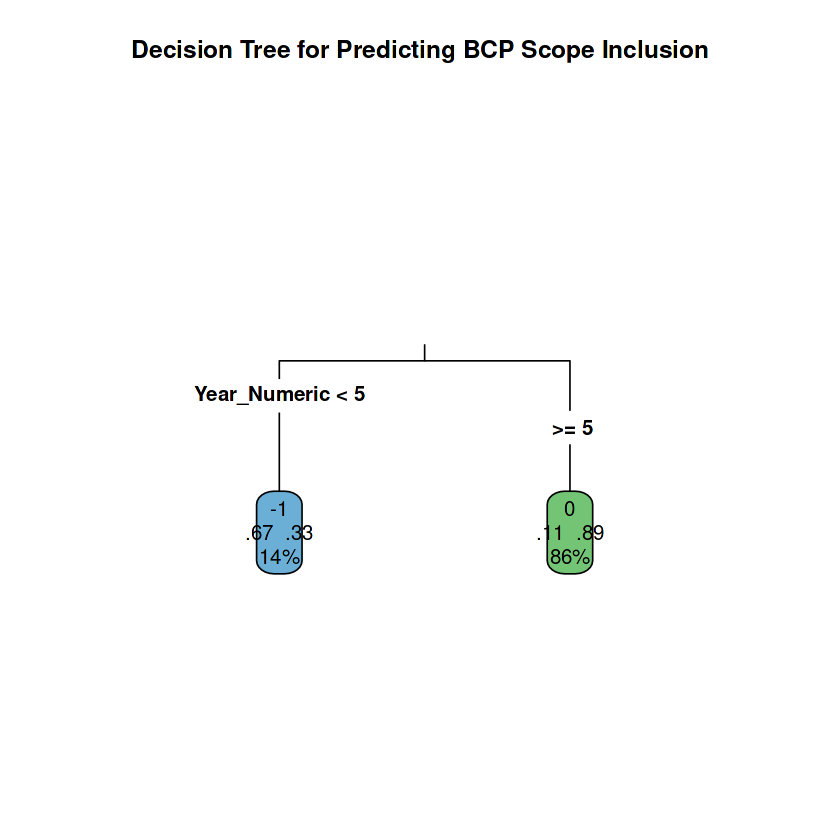

In [70]:
# Load required libraries
library(rpart)
library(rpart.plot)

# Prepare the data
# Ensure the target variable is binary and other predictors are in the correct format
data_filtered$BCP_Scope <- as.factor(data_filtered$BCP_Scope)
data_filtered$Year_Numeric <- as.numeric(data_filtered$Year_Numeric)

# Build the decision tree model
decision_tree_model <- rpart(
  BCP_Scope ~ `Is it a private or governmental healthcare?` +
    Year_Numeric +
    `Resources (supply chain, medications, equipment)?` +
    `Documentation (confidential, proper documentation, updated and tracking)?`,
  data = data_filtered,
  method = "class",
  control = rpart.control(minsplit = 5, cp = 0.01)
)

# Print the summary of the tree model
summary(decision_tree_model)

# Plot the decision tree
rpart.plot(decision_tree_model, type = 3, extra = 104, fallen.leaves = TRUE,
           main = "Decision Tree for Predicting BCP Scope Inclusion")


Discussion of Decision Tree Results
The decision tree analysis provides an intuitive way to understand the predictors influencing the inclusion of the BCP Scope variable. Below is the detailed discussion of the findings:

Tree Structure and Performance:

The decision tree was built on a dataset with 22 observations using the rpart function.
The tree split once, resulting in two terminal nodes. The complexity parameter (CP) value at which pruning occurred was 0.25.
The root node had a relative error of 1.00, indicating the starting point of the model. After one split, the relative error decreased to 0.75, with a cross-validation error (xerror) of 1.0 and an xstd (standard error) of 0.452.
Variable Importance:

Among the predictors, Year_Numeric had the highest variable importance (100), indicating its strong influence on the target variable.
Other predictors, such as Documentation (confidential, proper documentation, updated and tracking)?, Resources (supply chain, medications, equipment)?, and Is it a private or governmental healthcare?, were evaluated but did not contribute significantly to the primary splits.
Node Analysis:

Root Node (Node 1):
This node contained all 22 observations.
Predicted Class: 0 (indicating absence of BCP Scope).
Probabilities: 18.2% for 1 and 81.8% for 0.
The primary split was based on Year_Numeric < 4.5.
Left Child (Node 2):
This node contained 3 observations where Year_Numeric < 4.5.
Predicted Class: -1 (absence of BCP Scope).
Probabilities: 66.7% for -1 and 33.3% for 1.
Right Child (Node 3):
This node contained 19 observations where Year_Numeric ≥ 4.5.
Predicted Class: 0.
Probabilities: 10.5% for 1 and 89.5% for 0.
Insights:

The decision tree highlights the importance of Year_Numeric in determining whether the BCP Scope is included.
Observations with Year_Numeric ≥ 4.5 are predominantly associated with the absence of BCP Scope (Class 0).
The other predictors had minimal impact in this analysis, likely due to the small dataset or low variability within the data.
Limitations:

The dataset is relatively small, which limits the tree's complexity and the depth of insights.
The imbalance in class distribution (18 observations for 0 vs. 4 for 1) might affect the tree's ability to generalize.

